# DataSet description

**Objectives:**

-Identify the **key drivers** that determine the likelihood of credit **card default**.

-**Predict** the likelihood of credit card default for customers of the Bank

So, first we will see what are features and how many features are available to predict default payment.


**SEX: Gender**

              1 = male 
              2 = female

**EDUCATION:**

               1 = graduate school 
               2 = university 
               3 = high school 
               4 = others 
               5 = unknown 
               6 = unknown
               
**MARRIAGE:** Marital status

              1 = married
              2 = single
              3 = others
**PAY_0,2,3,4,5,6: Repayment status in September 2005, August 2005, July 2005, June 2005, May 2005, April 2005 (respectivey)**

              -2= no consumption
              -1= pay duly
              1 = payment delay for one month
              2 = payment delay for two months
              ... 
              8 = payment delay for eight months
              9 = payment delay for nine months and above


**Objectives:**

-Identify the **key drivers** that determine the likelihood of credit **card default**.

-**Predict** the likelihood of credit card default for customers of the Bank

# Load packages

In [98]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from pandas import set_option
plt.style.use('ggplot') # nice plots

from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV  
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Data processing 

In [217]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [100]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [219]:
df = df.rename(columns={'default.payment.next.month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [102]:
rename_dict = {
    'SEX': {1: 'male', 2: 'female'},
    'EDUCATION': {1: 'graduate school', 2: 'university', 3: 'high school', 
                  4: 'others', 5: 'unknown', 6: 'unknown', 0: 'unknown'},
    'MARRIAGE': {1: 'married', 2: 'single', 3: 'others', 0: 'unknown'}}

for col,values in rename_dict.items():
    df[col] = df[col].replace(rename_dict[col])

In [103]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [104]:
df[['LIMIT_BAL','AGE','SEX','EDUCATION','def_pay']].describe()

,LIMIT_BAL,AGE,def_pay
count,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,0.221200
std,129747.661567,9.217904,0.415062
min,10000.000000,21.000000,0.000000
25%,50000.000000,28.000000,0.000000
50%,140000.000000,34.000000,0.000000
75%,240000.000000,41.000000,0.000000
max,1000000.000000,79.000000,1.000000


**What data do we have?:**

-There are 30,000 individual bank clients.

-The average credit card limit is 167,484.

-The level of education is mainly school and university.

-Most clients are either married or single (less often, other status).

-The average age is 35.5 years, the standard deviation is 9.2.

-Average value of 0.221 means that 22.1% of credit card contracts will default last in monthly prices

In [105]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
def_pay      0
dtype: int64

# Exploratory data analysis

<Figure size 432x288 with 0 Axes>

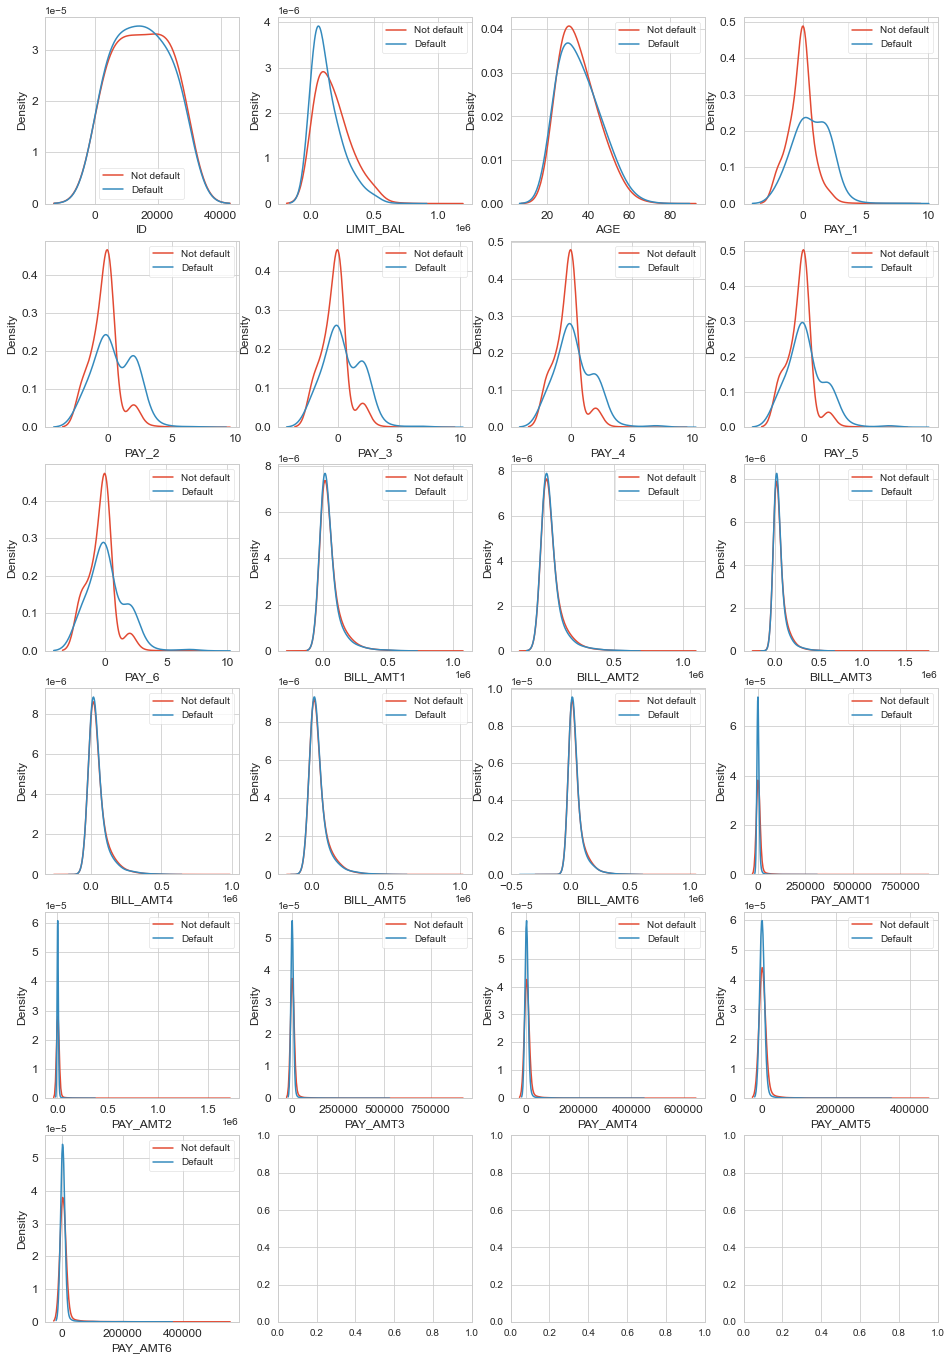

In [106]:
features = [f for f in df.columns if f not in ['def_pay', 'SEX', 'EDUCATION', 'MARRIAGE']]

i = 0
t0 = df[df['def_pay'] == 0]
t1 = df[df['def_pay'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(6,4,figsize=(16,24))

for feature in features:
    i += 1
    plt.subplot(6,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Not default")
    sns.kdeplot(t1[feature], bw=0.5,label="Default")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend()
plt.show();

**Observations**
 
Not Defaults have a higher proportion of people aged 30-40

Not Defaults have a MUCH higher proportion of zero or negative PAY_X variables (meaning that current or advanced payments are due to defaults in the next month). This is a strong relationship because the distribution is more fragmented - so we expect PAY_X to be important! Df ['LIMIT_BAL']. Value_counts (). Head (5)

## Credit limit amount grouped by default in next month

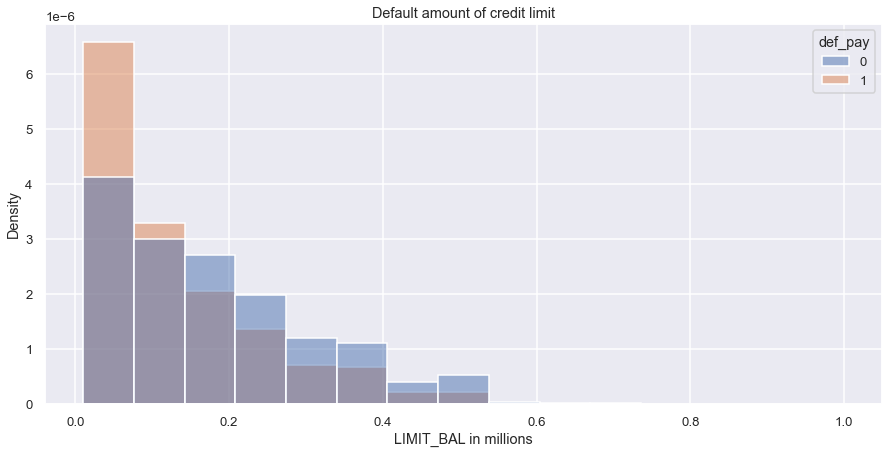

In [178]:
def millions_formatter(x, pos):
    return f'{x / 1000000}'
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.set_ylabel('value (in millions)')
plt.show()
plt.title('Default amount of credit limit')
g = sns.histplot(data=df, x='LIMIT_BAL', hue='def_pay', bins=15, kde=False,common_norm=False, stat="density")
g.xaxis.set_major_formatter(FuncFormatter(millions_formatter))
g.set_xlabel(f'{g.get_xlabel()} in millions' );

Most of the defaults are for credit **limits of 0-100,000** (and the density for this range is greater for Default than for not Default).

More defaults are 50,000, 20,000, and 30,000.

## Comparison of common features

**Credit limit and gender**

Let's check the distribution of the credit limit depending on gender.

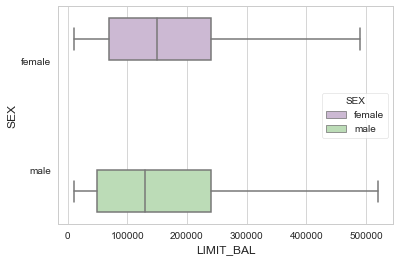

In [108]:
s = sns.boxplot( 
                x="LIMIT_BAL", 
                y="SEX", 
                hue="SEX",data=df, 
                palette="PRGn",
                showfliers=False)
plt.show();

The **credit limit** amount is fairly **balanced** for men and women.

**Credit limit vs education**

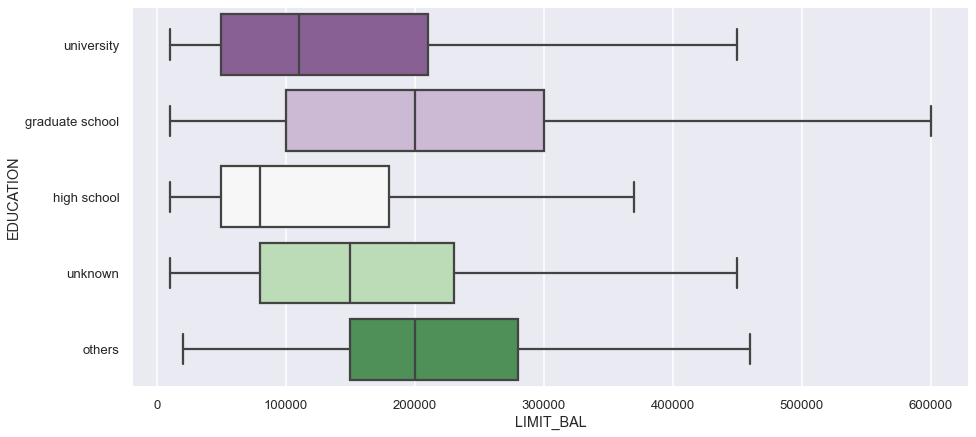

In [179]:
s = sns.boxplot( 
                y="EDUCATION", 
                x="LIMIT_BAL", 
                data=df, 
                palette="PRGn",
                showfliers=False)
plt.show();

Obviously, those clients with completed secondary education have a higher credit limit than others. This is probably due to the fact that most of the clients identified themselves with education 2.

**Education vs. Default.**

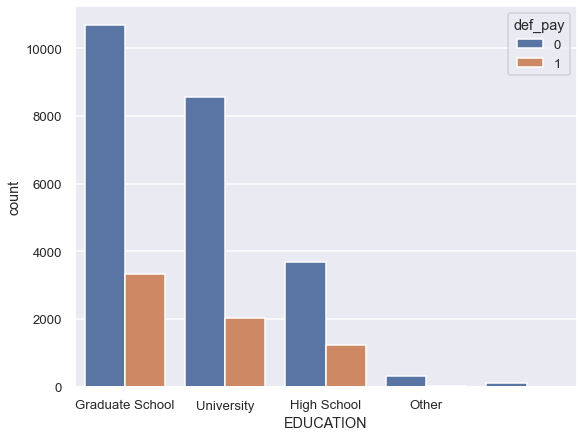

In [180]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)

edu = sns.countplot(x='EDUCATION', hue='def_pay', data=df)
edu.set_xticklabels(['Graduate School','University','High School','Other'])
plt.show()

**Marriage vs Limit_bal**

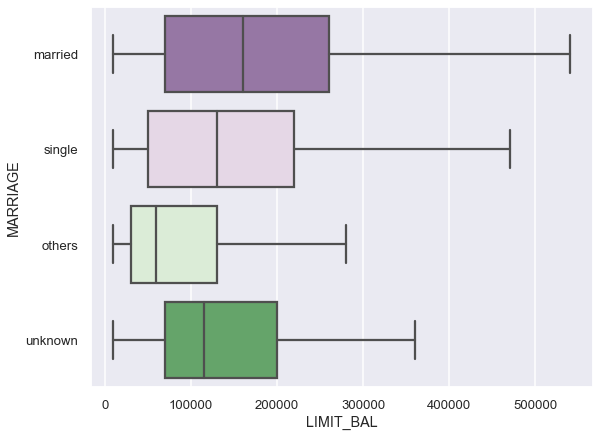

In [181]:
s = sns.boxplot( 
                y="MARRIAGE", 
                x="LIMIT_BAL", 
                data=df, 
                palette="PRGn",
                showfliers=False)
plt.show();

**Default vs Marriage**

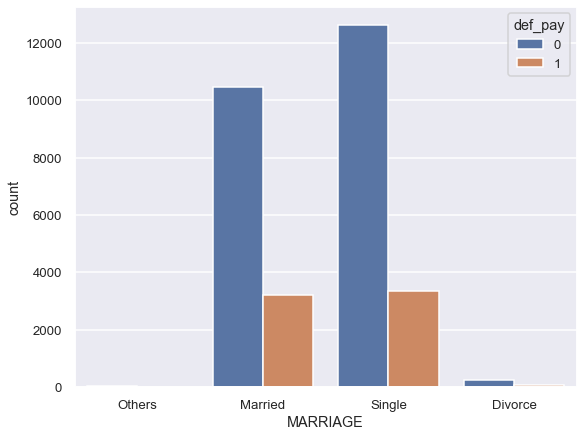

In [220]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)

marri = sns.countplot(x="MARRIAGE", hue='def_pay', data=df )
marri.set_xticklabels(['Others','Married','Single','Divorce'])
plt.show()

**Gender, education, age and marriage**

Let's show the distribution by gender, education, age and marriage.

Let's start by displaying charts with age distribution grouped by marriage status and gender.

In [68]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=df, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels())
    plt.show();

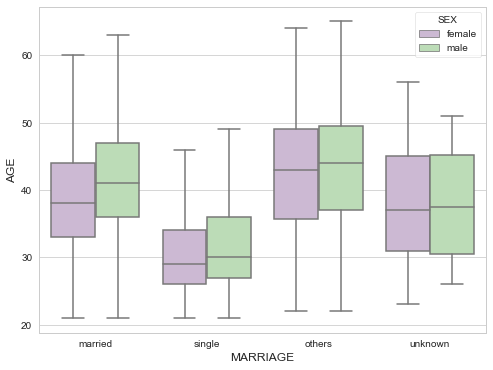

In [69]:
boxplot_variation('MARRIAGE','AGE', 'SEX',8)

It looks like Married status 'others', with mean values over 40 and Q4 values over 60 means mostly vidowed or divorced whilst Married status could be not specified or divorced, as Q1 values are above values for married of both sexes.

Married males have mean age above married women. Unmarried males have mean value for age above unmarried women as well but closer. Q3 abd Q4 values for married man are above corresponding values for married women.

**Explore Credit Behaviour**
Now we explore PAY_1.

PAY_1: Repayment status in September, 2005 (most recent month)

(-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

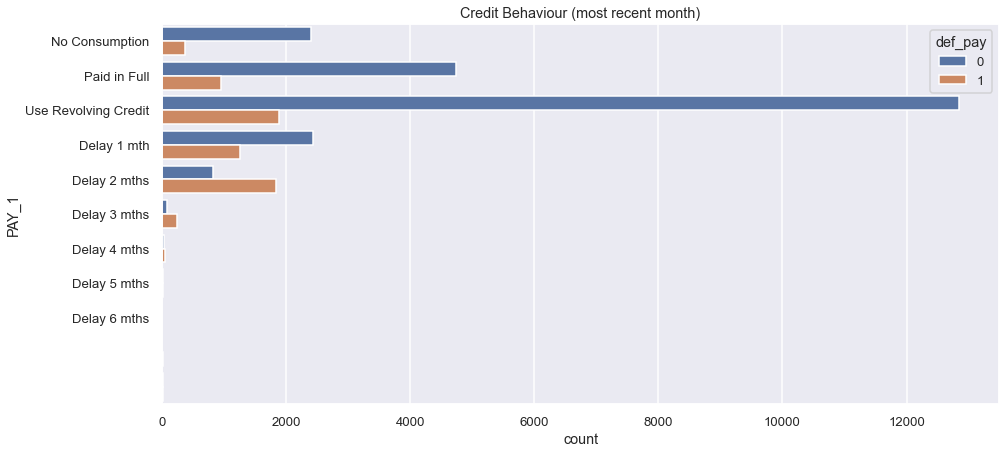

In [222]:
sns.set(rc={'figure.figsize':(15,7)})
sns.set_context("talk", font_scale=0.8)

pay1 = sns.countplot(y="PAY_1", hue='def_pay', data=df)
pay1.set_yticklabels(['No Consumption','Paid in Full','Use Revolving Credit','Delay 1 mth','Delay 2 mths'
                     ,'Delay 3 mths','Delay 4 mths','Delay 5 mths','Delay 6 mths'])
pay1.set_title('Credit Behaviour (most recent month)')

plt.show()

## Mapping the target: categorizing

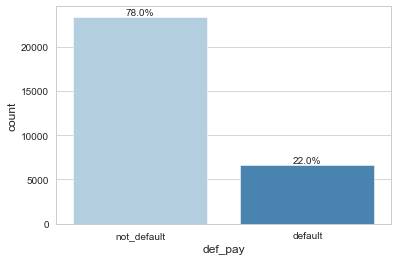

In [134]:
ax = sns.countplot(x = 'def_pay',data=df, palette="Blues")
ax.patches

for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, str(round(height/len(df)*100, 0)) + '%',
            ha='center', va='bottom')
ax.set_xticklabels(['not_default','default']);

Graph above, shows that from our sample of 30 thousand clients, there are a little more than 6 thousand default credit cards

# Correlation

In [21]:
X = df.drop('def_pay', axis=1)  
y = df['def_pay']

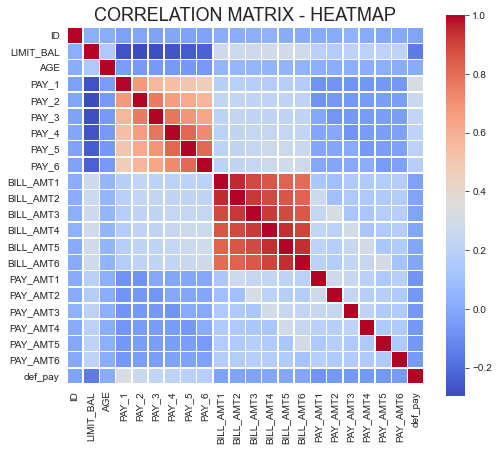

In [22]:
corr = df.corr() 
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

Heatmat shows that the **functions are correlated** with each other, for example PAY_1,2,3,4,5,6 and BILL_AMT1,2,3,4,5,6. In these cases, the correlation is positive.

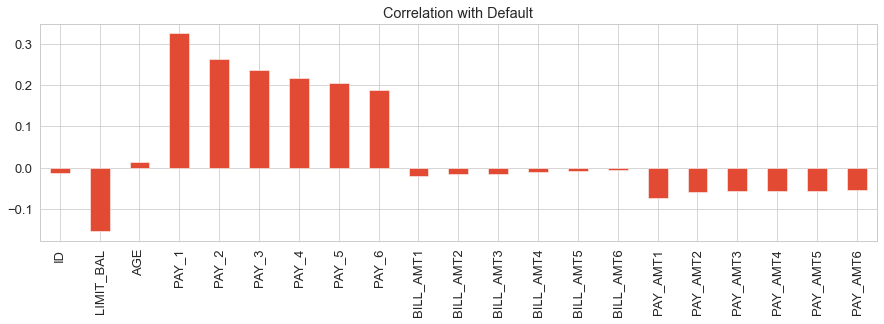

In [23]:
X.corrwith(df['def_pay']).plot.bar(
        figsize = (15, 4), title = "Correlation with Default", fontsize = 13,
        rot = 90, grid = True)

We can see clearly how **signigicant** is **PAY_X correlation** with **Default** of a client

# Spliting the data into train and test sets

In [24]:
df = pd.read_csv('UCI_Credit_Card.csv')
df = df.rename(columns={'default.payment.next.month': 'def_pay', 
                        'PAY_0': 'PAY_1'})

In [25]:
X = df.drop('def_pay', axis=1)  
y = df['def_pay']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, stratify=y, random_state=42)

# Building models

## Logistic Regression

In [131]:
param_grid = {'C': np.logspace(-5, 8, 15)}

# Instantiate a logistic regression classifier
logreg = LogisticRegression(max_iter=250)

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg,param_grid , cv=5, random_state=0)

# Fit it to the data
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 

Tuned Logistic Regression Parameters: {'C': 8.483428982440725e-05}


Accuracy: 0.7787878787878788

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7710
           1       0.00      0.00      0.00      2190

    accuracy                           0.78      9900
   macro avg       0.39      0.50      0.44      9900
weighted avg       0.61      0.78      0.68      9900


Average 5-Fold CV Score: 0.7789 , Standard deviation: 0.0001


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


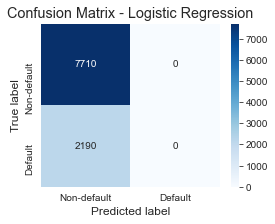

In [133]:
LR = LogisticRegression(C=8.483428982440725e-05, random_state=0, max_iter=250, solver='liblinear')
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(LR, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,LR.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");

## Decision Tree Classifier

### Hyperparameter Tuning

In [76]:
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9,10], #large value will result in overfitting
              "max_features": [1,2,3,4,5,6,7,8,9,10], #too many irrelevant features may result in a bias result
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9,10],
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))

Tuned Decision Tree Parameters: {'min_samples_leaf': 4, 'max_features': 9, 'max_depth': 4, 'criterion': 'entropy'}


### Running model

Accuracy: 0.8098989898989899

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      7710
           1       0.68      0.26      0.38      2190

    accuracy                           0.81      9900
   macro avg       0.75      0.61      0.63      9900
weighted avg       0.79      0.81      0.78      9900


Average 5-Fold CV Score: 0.8052 , Standard deviation: 0.0076


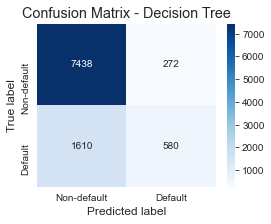

In [114]:
Tree = DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, 
                                     max_features= 9, min_samples_leaf= 4, 
                                     random_state=0)
Tree.fit(X_train, y_train)
y_pred = Tree.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(Tree, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)), 
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Tree.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision Tree");

### Shap value

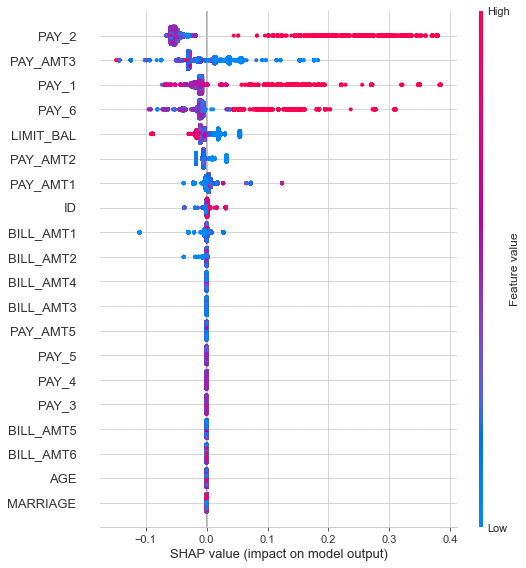

In [117]:
import shap  

# Create object that can calculate shap values
explainer = shap.TreeExplainer(Tree)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_test)

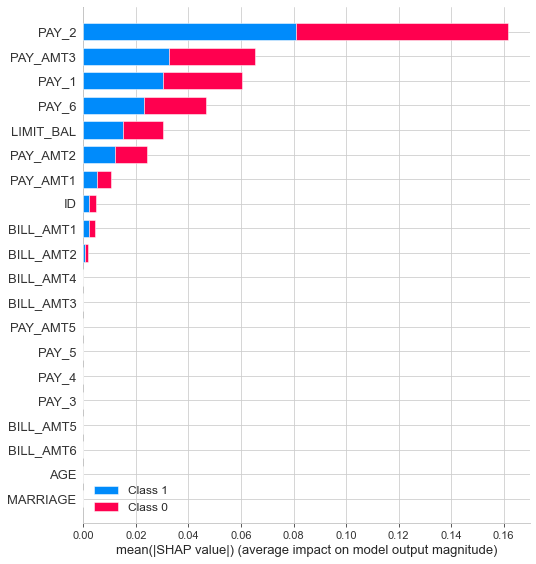

In [116]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

When plotting, we call shap_values[1]. For classification problems, there is a separate array of SHAP values for each possible outcome. In this case, we index in to get the SHAP values for the prediction of "True".

## Random Forest Classifier

### Hyperparameter Tuning

In [110]:
# Create the random grid
param_dist = {'n_estimators': [50,100,150,200,250,300],
               "max_features": [1,2,3,4,5,6,7,8,9,10],
               'max_depth': [1,2,3,4,5,6,7,8,9,10],
               "criterion": ["gini", "entropy"]}

rf = RandomForestClassifier()

rf_cv = RandomizedSearchCV(rf, param_distributions = param_dist, 
                           cv = 5, random_state=0, n_jobs = -1)

shap_rf = rf_cv.fit(X, y)

print("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))

Tuned Random Forest Parameters: {'n_estimators': 100, 'max_features': 7, 'max_depth': 5, 'criterion': 'gini'}


### Running model

Accuracy: 0.8175757575757576

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7710
           1       0.67      0.35      0.46      2190

    accuracy                           0.82      9900
   macro avg       0.75      0.65      0.68      9900
weighted avg       0.80      0.82      0.80      9900


Average 5-Fold CV Score: 0.8206 , Standard deviation: 0.0094


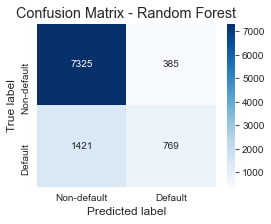

In [111]:
Ran = RandomForestClassifier(criterion= 'gini', max_depth= 5, 
                                     max_features= 7, n_estimators= 100, 
                                     random_state=0)
Ran.fit(X_train, y_train)
y_pred = Ran.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(Ran, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Ran.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest");

### Shap value

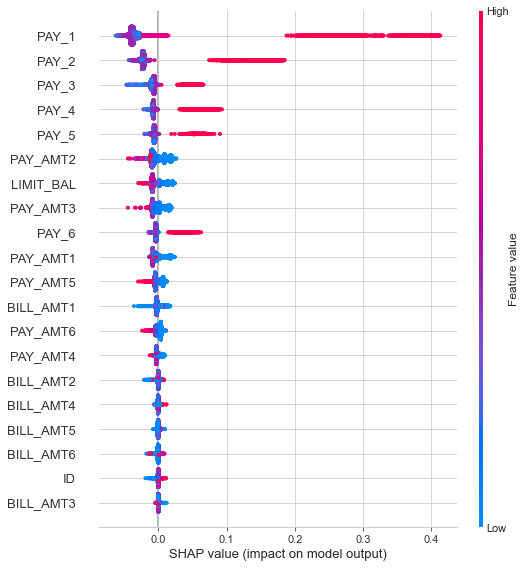

In [112]:
explainer = shap.TreeExplainer(Ran)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

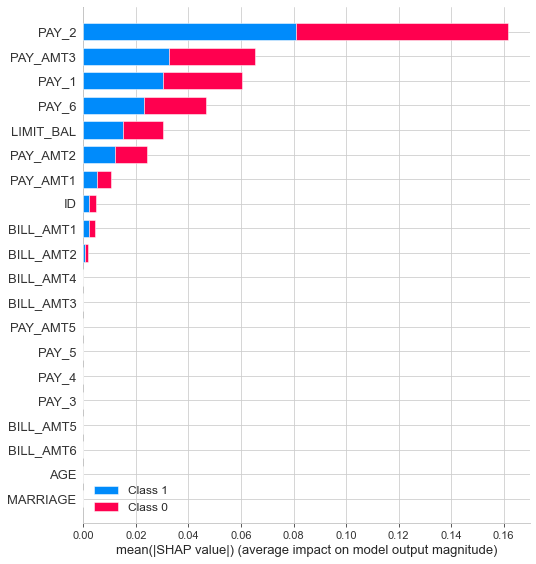

In [135]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

## ROC AUC curve

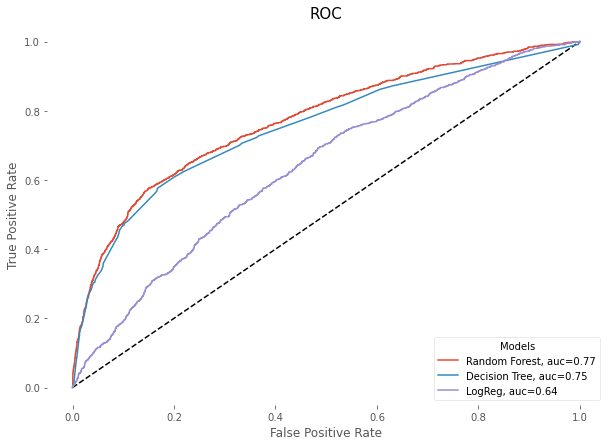

In [20]:
y_pred_proba_RF = Ran.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba_RF)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba_RF)

y_pred_proba_DT = Tree.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba_DT)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba_DT)

y_pred_proba_LR = LR.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba_LR)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba_LR)


plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Random Forest, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="Decision Tree, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="LogReg, auc="+str(round(auc3,2)))

plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);